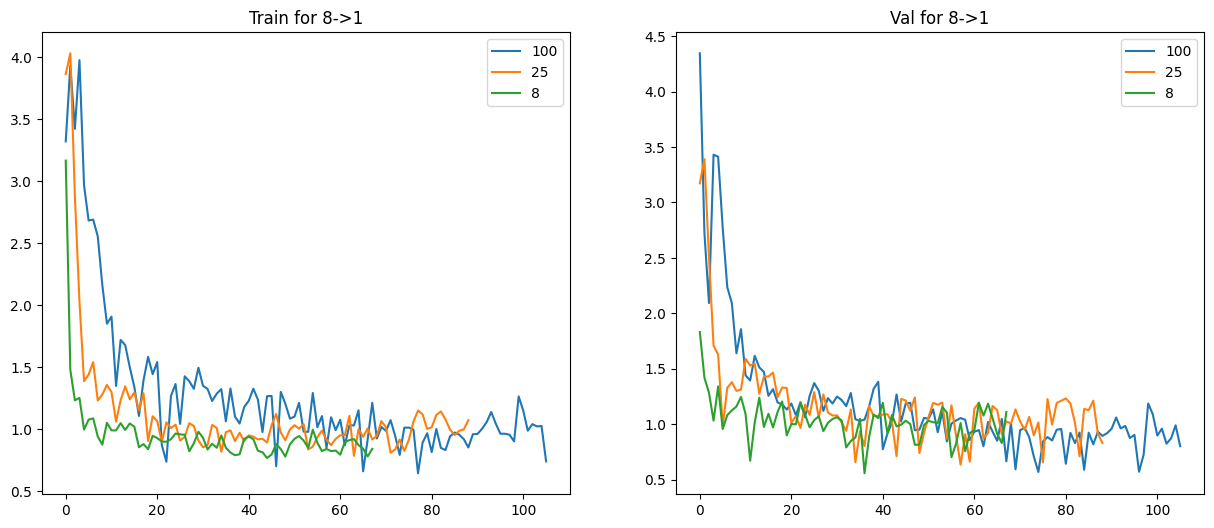

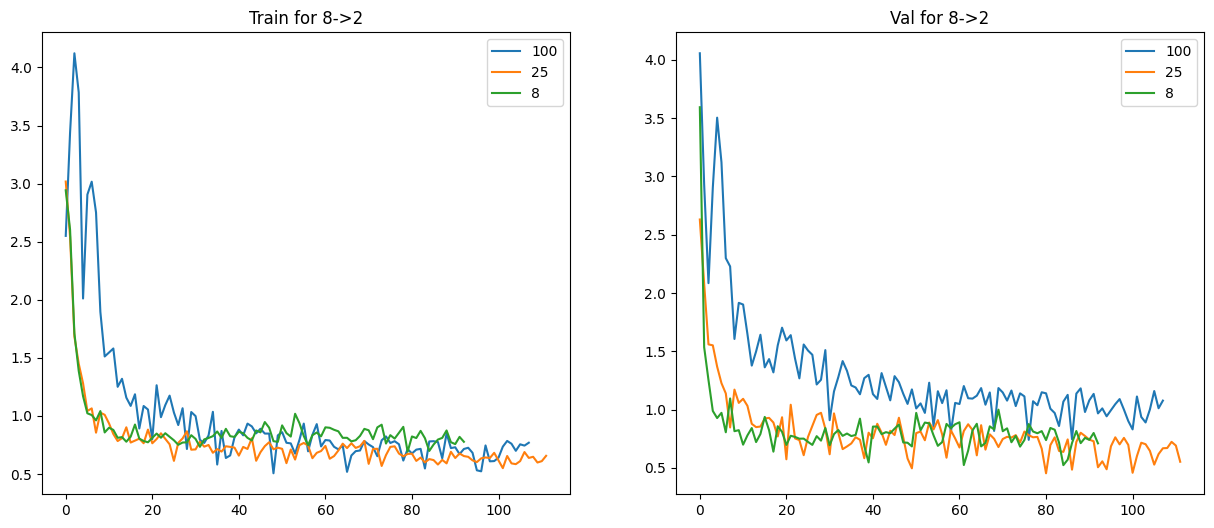

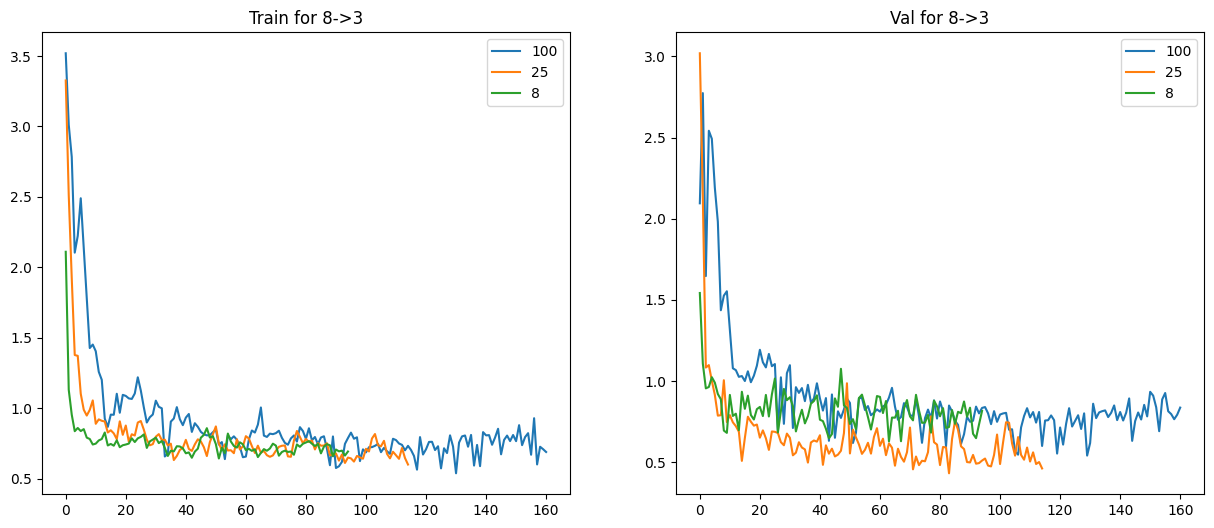

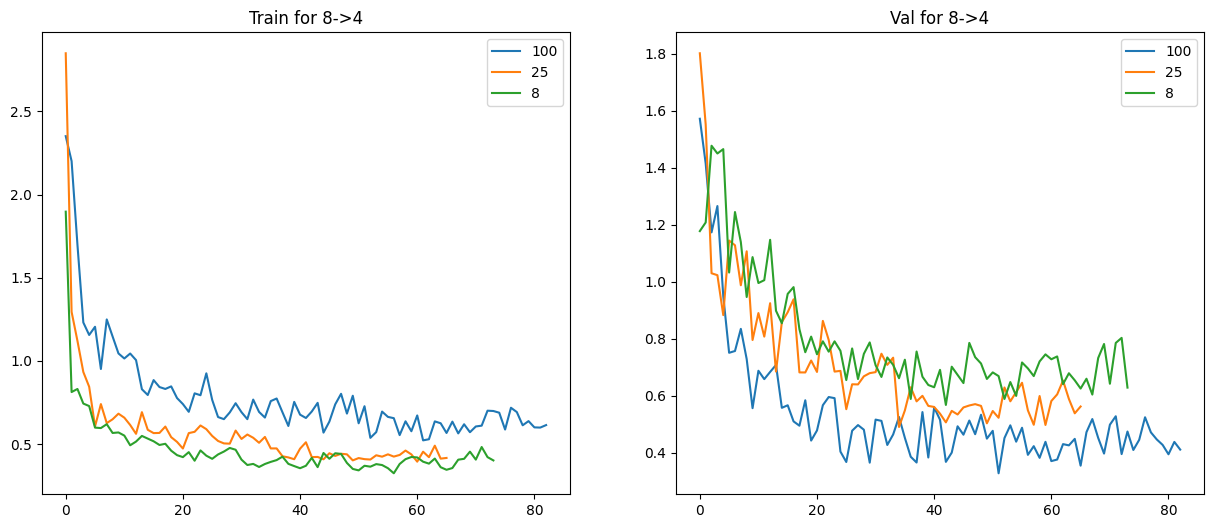

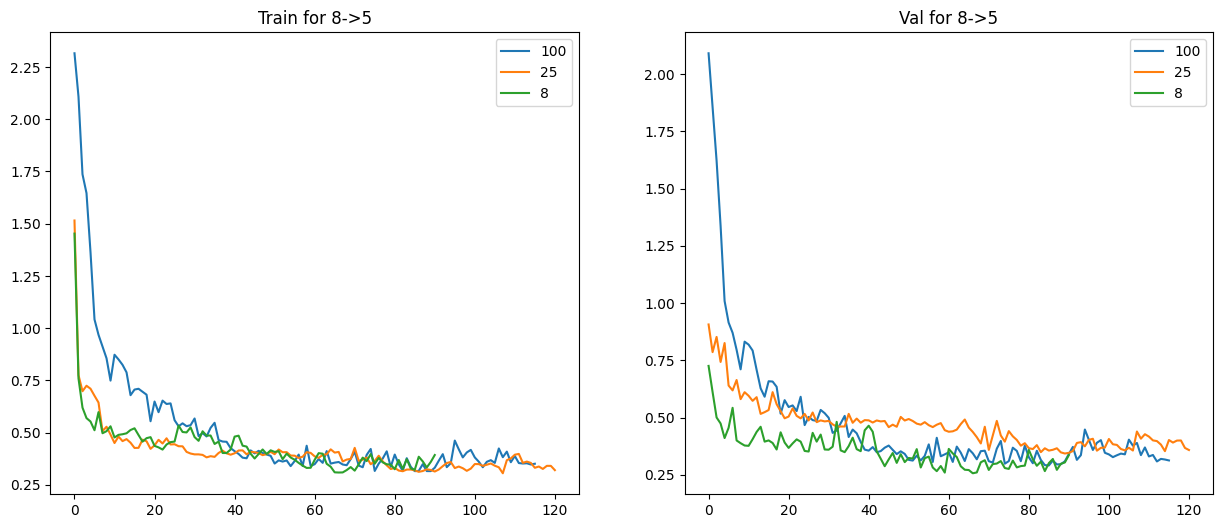

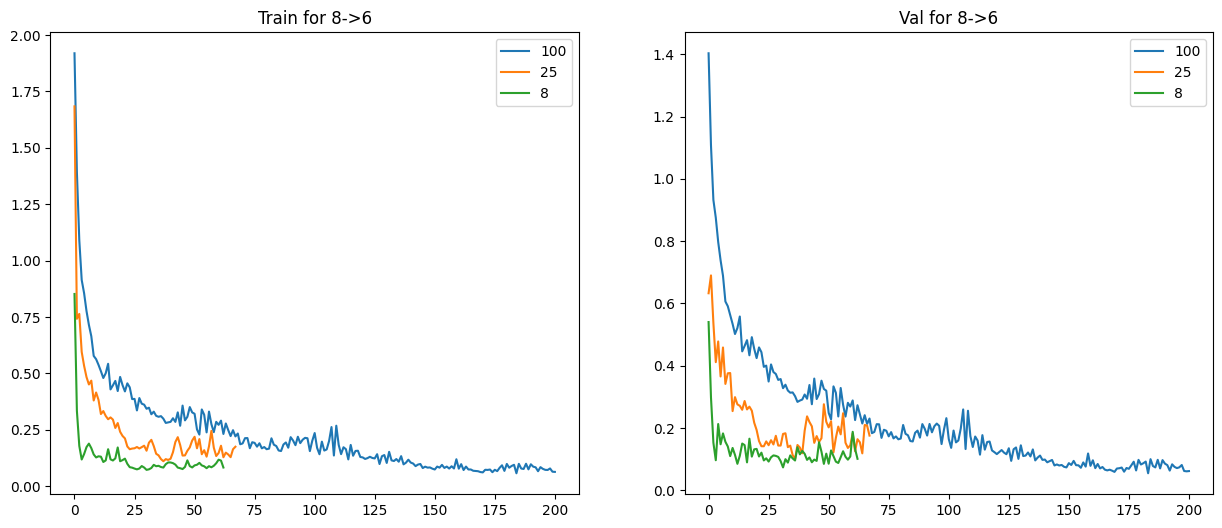

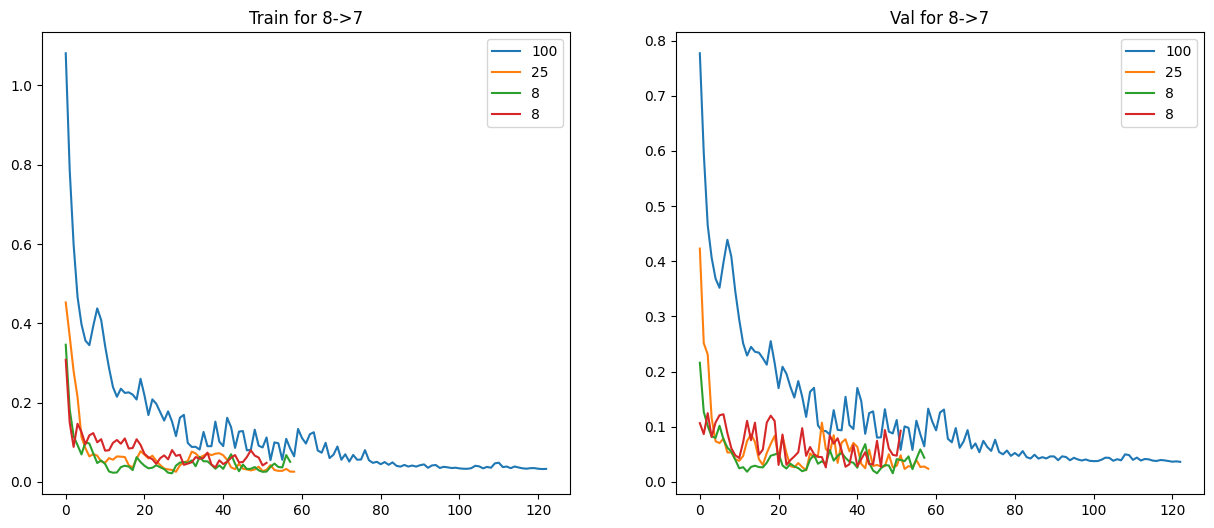

In [3]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Define the main folder
main_folder = 'runs/ee'
# Initialize data storage
plot_data = {}
all_files ={subfolder:[a for a in os.listdir(os.path.join(main_folder, subfolder)) if 'loss_train' in a] for subfolder in os.listdir(main_folder) }
dfdic={'Trainlossfile':[],
       'Vallossfile':[],
       'batch':[],
       'tq':[]
       }
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    for a in os.listdir(subfolder_path):
        if 'loss_train' in a:
            x=a[15]
            y=a[18:]
            dfdic['Trainlossfile'].append(subfolder_path+'/'+a)
            dfdic['Vallossfile'].append(subfolder_path+'/'+f'loss_val(8)({x})_{y}')
            dfdic['batch'].append(subfolder)
            dfdic['tq'].append(8-int(x))
train_data_all=[]
val_data_all=[]
batch_all=[]
df=pd.DataFrame(dfdic)
for tq in df['tq'].unique():
    train_data_all=[]
    val_data_all=[]
    batch_all=[]

    dftq=df[df.tq==tq]
    for i,row in dftq.iterrows():
        # Load .npy files
        train_data = np.load(row.Trainlossfile)
        val_data = np.load(row.Vallossfile)
        
        # Collect data
        train_data_all.append(train_data)
        val_data_all.append(val_data)
        batch_all.append(row.batch)

    # Adjust for different lengths by padding with NaN
    max_length = max(len(data) for data in train_data_all + val_data_all)
    
    train_data_all = [np.pad(data, (0, max_length - len(data)), constant_values=np.nan) for data in train_data_all]
    val_data_all = [np.pad(data, (0, max_length - len(data)), constant_values=np.nan) for data in val_data_all]

    # Stack and calculate element-wise statistics while ignoring NaNs
    train_data_all = np.vstack(train_data_all)  # Shape: (num_files, max_length)
    val_data_all = np.vstack(val_data_all)
    x_ticks = range(max_length)  # X values corresponding to vector indices
    sns.color_palette("cubehelix", as_cmap=True)
    sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
    f, axes = plt.subplots(1, 2,figsize=(15,6))

    for i,td in enumerate(train_data_all):
        axes[0].set_title(f'Train for 8->{8-int(tq)}')
        sns.lineplot(x=x_ticks, y=td, label=batch_all[i],ax=axes[0])
    for i,td in enumerate(val_data_all):
        axes[1].set_title(f'Val for 8->{8-int(tq)}')
        sns.lineplot(x=x_ticks, y=td, label=batch_all[i],ax=axes[1])
    plt.show()
